#DEEP LEARNING

#Digit recognition using Convolutional Neural Network

The MNIST dataset, officially known as "The MNIST Database of Handwritten Digits," is a famous dataset used to train machine-learning models (and neural networks) to recognize handwritten digits. Each digit in the dataset consists of a 28x28 array of numbers representing pixel values from 0 to 255. In this example, we will use Keras to build and train a convolutional neural network (CNN) on the MNIST dataset. The dataset is included in Keras as a sample dataset, so we'll begin by loading it and examining its content and structure.

In [ ]:
from keras.datasets import mnist

In [ ]:
(train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()
print('train_images: ' + str(train_imgs.shape))
print('train_labels: ' + str(train_labels.shape))
print('test_images: ' + str(test_imgs.shape))
print('test_labels: ' + str(test_labels.shape))

train_images: (60000, 28, 28)
train_labels: (60000,)
test_images: (10000, 28, 28)
test_labels: (10000,)


In [ ]:
import tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical

x_train = train_imgs.reshape(60000,28,28,1) /255
x_test = test_imgs.reshape(10000,28,28,1)/255

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

#Visualising the dataset

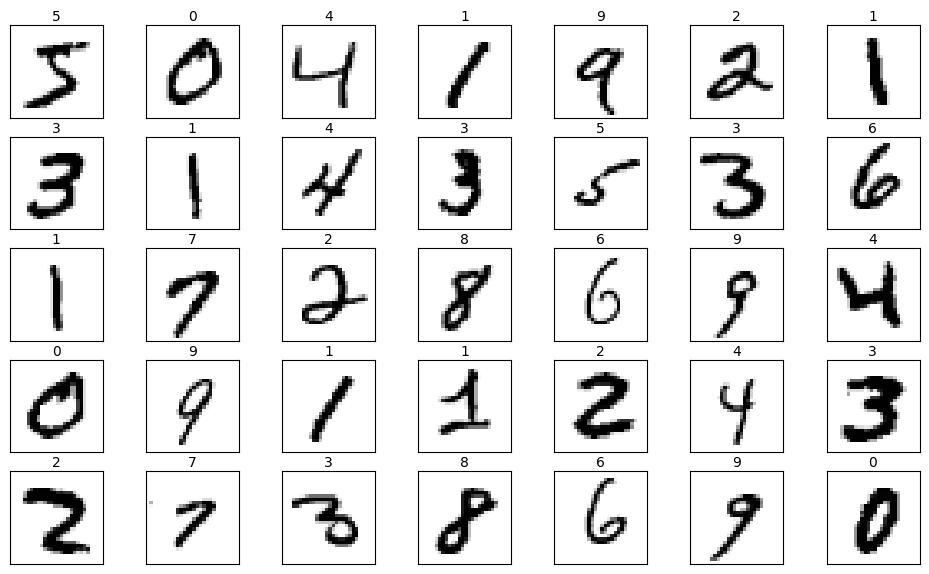

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5,7,figsize=(12,7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
  ax.imshow(train_imgs[i], cmap=plt.cm.gray_r)
  ax.text(0.45, 1.05, str(train_labels[i]), transform=ax.transAxes)


# Training

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape= (28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation= 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation= 'relu'))
model.add(Dense(10, activation= 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
hist = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 15, batch_size= 50)

Epoch 1/15
1200/1200 [==============================] - 56s 46ms/step - loss: 0.7453 - accuracy: 0.7622 - val_loss: 0.2825 - val_accuracy: 0.9169
Epoch 2/15
1200/1200 [==============================] - 52s 43ms/step - loss: 0.2317 - accuracy: 0.9301 - val_loss: 0.1591 - val_accuracy: 0.9515
Epoch 3/15
1200/1200 [==============================] - 52s 43ms/step - loss: 0.1488 - accuracy: 0.9551 - val_loss: 0.1151 - val_accuracy: 0.9642
Epoch 4/15
1200/1200 [==============================] - 50s 42ms/step - loss: 0.1166 - accuracy: 0.9639 - val_loss: 0.0941 - val_accuracy: 0.9700
Epoch 5/15
1200/1200 [==============================] - 52s 43ms/step - loss: 0.1001 - accuracy: 0.9686 - val_loss: 0.0841 - val_accuracy: 0.9738
Epoch 6/15
1200/1200 [==============================] - 52s 44ms/step - loss: 0.0885 - accuracy: 0.9724 - val_loss: 0.0847 - val_accuracy: 0.9726
Epoch 7/15
1200/1200 [==============================] - 53s 44ms/step - loss: 0.0810 - accuracy: 0.9751 - val_loss: 0.0731 -

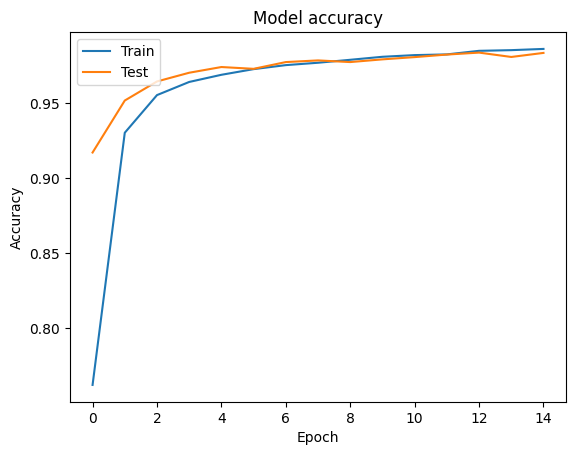

In [ ]:
# Plot training & validation accuracy values
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

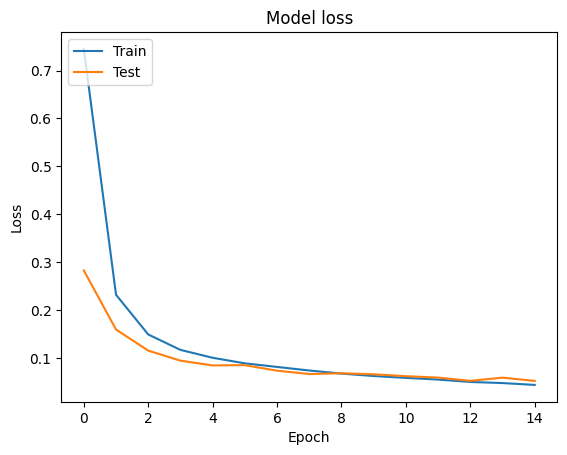

In [ ]:
# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {scores[1]:.1%}')

Accuracy: 98.3%


#Testing

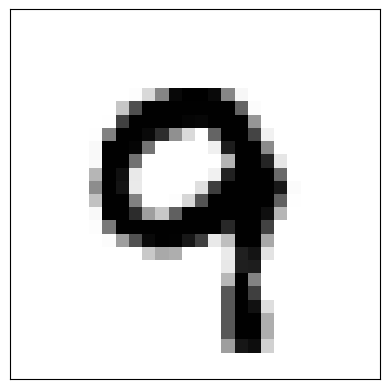

In [ ]:
test_img = test_imgs[99]
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.imshow(test_img, cmap=plt.cm.gray_r)

In [ ]:

x = test_img.reshape(1, 28, 28, 1) / 255
model.predict(x)

1/1 [==============================] - 0s 184ms/step


array([[9.1849037e-12, 9.3827147e-14, 2.3519009e-09, 5.2609594e-06,
        1.0287171e-08, 1.0767540e-09, 2.8248813e-17, 4.0402341e-05,
        8.6700425e-08, 9.9995422e-01]], dtype=float32)

In [ ]:
import numpy as np

predicted_class = np.argmax(model.predict(x), axis=-1)[0]
print('Looks like a ' + str(predicted_class) + '!')

1/1 [==============================] - 0s 22ms/step
Looks like a 9!


#Prediction:

#A single image from the test set is selected (sample_image). The model predicts the class of this image. The predicted class is printed.